<a href="https://colab.research.google.com/github/oconcito8/aprendizaje-automatico-entregas-recu/blob/main/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 3 Aprendizaje Automático.

### Redes neuronales convolucionales

---
Carlos Ocón Garay

Grupo: B08


Enunciado
Crea un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y
clasificar imágenes en 100 categorías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos
al conjunto de datos CIFAR-100 dataset, que os podréis descargar de
https://www.cs.toronto.edu/~kriz/cifar.html.
Este conjunto de datos tiene 100 clases que contienen 600 imágenes cada una. Hay 500
imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del
CIFAR-100 se agrupan en 20 superclases. Cada imagen viene con una etiqueta "fina" (la
clase a la que pertenece) y una etiqueta "gruesa" (la superclase a la que pertenece).
Aquí está la lista de clases del CIFAR-100.):
Cuestiones para implementar y responder
• Debéis decidir la estructura de red neuronal convolucional (número de
parámetros) y los valores de todos los hiperparámetros que pemitan tener la
mayor precisión posible en los datos de test.
• Explicar la salida de la llamada model.summary() de vuestra red definitiva.
• Seguir los modelos metodológicos vistos en clase (sobre un modelo base, ir
incrementando la complejidad para mejorar el modelo hasta donde se pueda)
• Ver los conceptos de batch_normalization y dropout y ver si se podría mejorar
el modelo con ello.
https://keras.io/api/layers/normalization_layers/batch_normalization/
https://keras.io/api/layers/regularization_layers/dropout/


# Cargar y Preprocesar el Dataset CIFAR-100

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el dataset CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Preprocesamiento de los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


# Mostrar la forma de los datos

In [26]:

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


# Función para visualizar algunas imágenes del dataset de entrenamiento

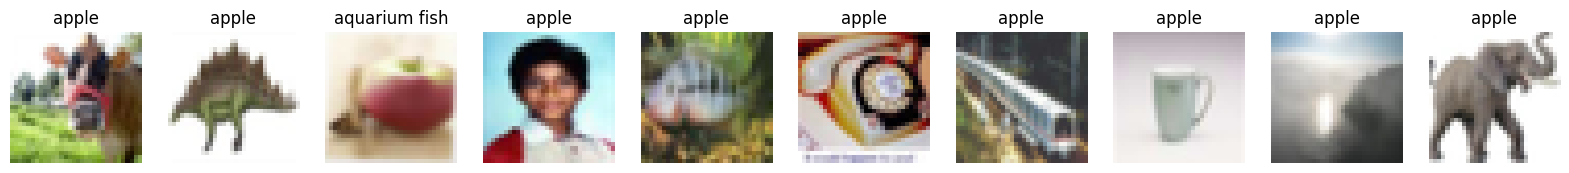

In [29]:
import matplotlib.pyplot as plt

# Definir una función para mostrar imágenes
def plot_images(images, labels, classes, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(classes[int(labels[i][0])])
        plt.axis('off')
    plt.show()

# Lista de clases del CIFAR-100
classes = ['apple', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
           'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
           'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
           'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
           'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion',
           'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse',
           'mushroom', 'oak', 'orange', 'orchid', 'otter', 'palm', 'pear', 'pickup truck',
           'pine', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
           'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
           'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
           'sweet pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf',
           'woman', 'worm']

# Visualizar algunas imágenes del dataset de entrenamiento
plot_images(x_train, y_train, classes)


Hacemos un modelo simple con una capa convluciona y otra de max pooling para tener un caso base que mejorar.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Definir el modelo simple
simple_model = Sequential()

# Añadir una capa convolucional y de pooling
simple_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
simple_model.add(BatchNormalization())
simple_model.add(MaxPooling2D((2, 2)))

# Añadir capas densas
simple_model.add(Flatten())
simple_model.add(Dense(256, activation='relu'))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(100, activation='softmax'))

# Compilar el modelo
simple_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
simple_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               1843456   
                                                                 
 dropout_7 (Dropout)         (None, 256)              

El sigunete modelo va ser un modelo sobreajustado que aprendederá mas porque tiene mas capas de profundidad.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler

# Definir el modelo
model = Sequential()

# Añadir capas convolucionales y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


# Añadir capas densas
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# Definir el generador de datos con aumento
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(x_train)

# Definir el scheduler para el aprendizaje
def lr_scheduler(epoch):
    return 0.001 * 0.95 ** epoch

scheduler = LearningRateScheduler(lr_scheduler)

# Entrenar el modelo
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[scheduler]
)


Epoch 1/50
782/782 [==============================] - 31s 38ms/step - loss: 4.1972 - accuracy: 0.0540 - val_loss: 3.7824 - val_accuracy: 0.1122 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 29s 38ms/step - loss: 3.7179 - accuracy: 0.1220 - val_loss: 3.4286 - val_accuracy: 0.1818 - lr: 9.5000e-04
Epoch 3/50
782/782 [==============================] - 32s 40ms/step - loss: 3.4876 - accuracy: 0.1639 - val_loss: 3.2149 - val_accuracy: 0.2142 - lr: 9.0250e-04
Epoch 4/50
782/782 [==============================] - 30s 38ms/step - loss: 3.3356 - accuracy: 0.1909 - val_loss: 3.0957 - val_accuracy: 0.2362 - lr: 8.5737e-04
Epoch 5/50
782/782 [==============================] - 30s 38ms/step - loss: 3.2247 - accuracy: 0.2122 - val_loss: 2.9809 - val_accuracy: 0.2596 - lr: 8.1451e-04
Epoch 6/50
782/782 [==============================] - 30s 39ms/step - loss: 3.1438 - accuracy: 0.2262 - val_loss: 2.9476 - val_accuracy: 0.2669 - lr: 7.7378e-04
Epoch 7/50
782/782 [==================

In [33]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [34]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 1s 3ms/step - loss: 2.2856 - accuracy: 0.4072
Test accuracy: 40.72%


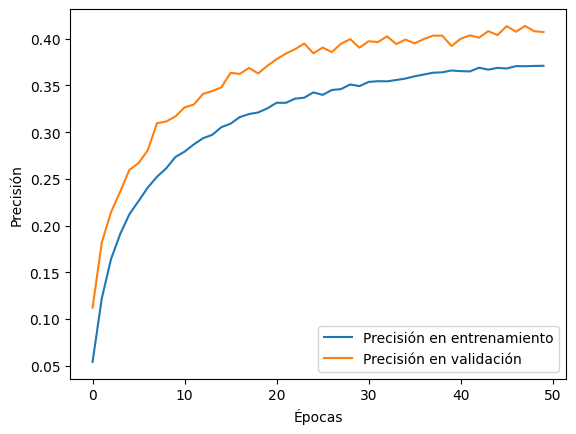

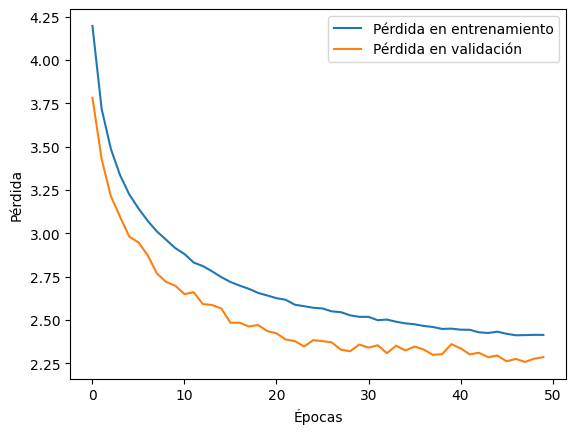

In [35]:
import matplotlib.pyplot as plt

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



In [36]:

import numpy as np

# Hacer predicciones en el conjunto de datos de prueba
predictions = model.predict(x_test)

# Convertir las predicciones y etiquetas verdaderas a clases
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)



313/313 [==============================] - 1s 2ms/step


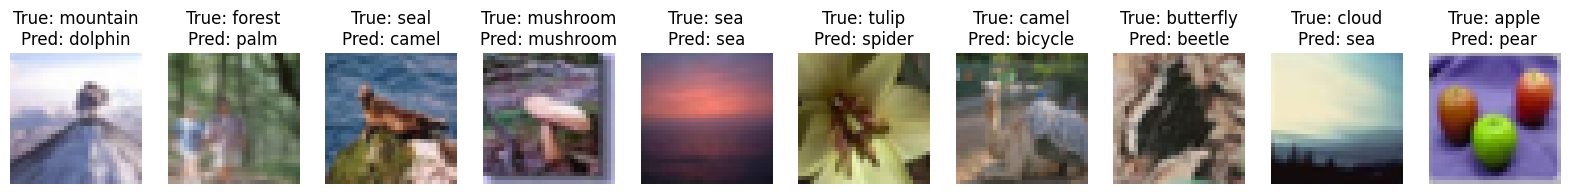

In [37]:
# Mostrar algunas imágenes con sus predicciones
def plot_predictions(images, true_labels, pred_labels, classes, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        true_label = classes[true_labels[i]]
        predicted_label = classes[pred_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.show()

# Lista de clases del CIFAR-100
classes = ['apple', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
           'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
           'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
           'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
           'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion',
           'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse',
           'mushroom', 'oak', 'orange', 'orchid', 'otter', 'palm', 'pear', 'pickup truck',
           'pine', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
           'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
           'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
           'sweet pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf',
           'woman', 'worm']


# Visualizar algunas predicciones
plot_predictions(x_test, y_true_classes, y_pred_classes, classes)


Matriz de confusión:
 [[70  1  0 ...  0  0  0]
 [ 0 50  0 ...  1  0  1]
 [ 1  0 27 ...  2  6  0]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  1  2 ...  1 12  1]
 [ 1  0  0 ...  0  0 51]]
Reporte de clasificación:
                precision    recall  f1-score   support

        apple       0.80      0.70      0.74       100
aquarium fish       0.50      0.50      0.50       100
         baby       0.46      0.27      0.34       100
         bear       0.26      0.14      0.18       100
       beaver       0.20      0.14      0.17       100
          bed       0.29      0.29      0.29       100
          bee       0.38      0.50      0.43       100
       beetle       0.40      0.48      0.44       100
      bicycle       0.28      0.46      0.34       100
       bottle       0.57      0.45      0.50       100
         bowl       0.30      0.14      0.19       100
          boy       0.32      0.22      0.26       100
       bridge       0.37      0.39      0.38       100
          bus       0.21

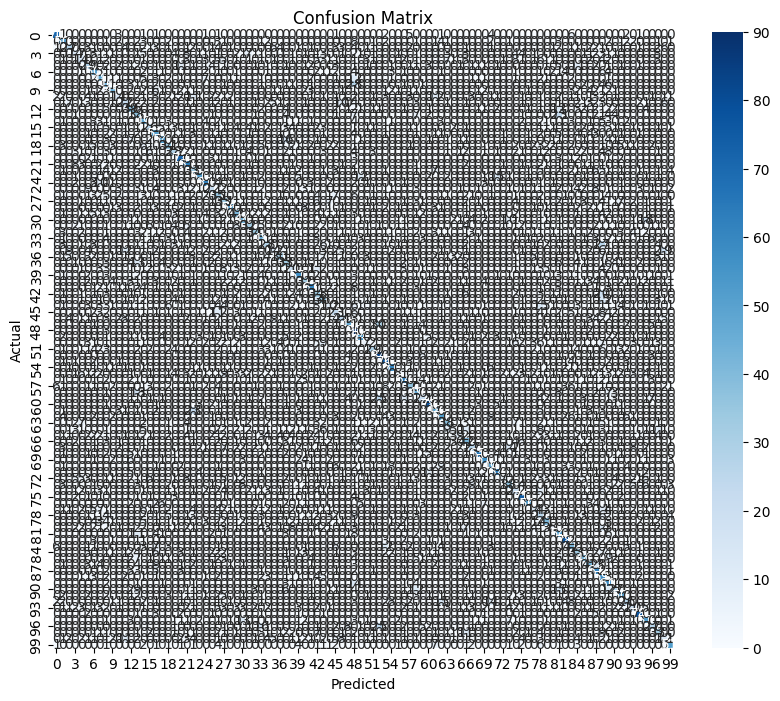

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print('Matriz de confusión:\n', conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_true_classes, y_pred_classes, target_names=classes)
print('Reporte de clasificación:\n', class_report)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las predicciones y etiquetas verdaderas a clases
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



AÑADIMOS CAPAS DE BATCHNORMALITATION Y DROPOUT PARA EVITAR SOBREAJUSTE.

In [39]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Ejemplo de cómo añadir batch normalization y dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
class_report = classification_report(y_true_classes, y_pred_classes)
print(class_report)


              precision    recall  f1-score   support

           0       0.80      0.70      0.74       100
           1       0.50      0.50      0.50       100
           2       0.46      0.27      0.34       100
           3       0.26      0.14      0.18       100
           4       0.20      0.14      0.17       100
           5       0.29      0.29      0.29       100
           6       0.38      0.50      0.43       100
           7       0.40      0.48      0.44       100
           8       0.28      0.46      0.34       100
           9       0.57      0.45      0.50       100
          10       0.30      0.14      0.19       100
          11       0.32      0.22      0.26       100
          12       0.37      0.39      0.38       100
          13       0.21      0.38      0.27       100
          14       0.34      0.49      0.40       100
          15       0.37      0.26      0.30       100
          16       0.36      0.51      0.42       100
          17       0.64    

Epoch 1/15
391/391 [==============================] - 5s 12ms/step - loss: 2.5915 - accuracy: 0.3332 - val_loss: 2.7333 - val_accuracy: 0.3195
Epoch 2/15
391/391 [==============================] - 4s 9ms/step - loss: 2.5737 - accuracy: 0.3353 - val_loss: 2.4341 - val_accuracy: 0.3671
Epoch 3/15
391/391 [==============================] - 4s 10ms/step - loss: 2.5415 - accuracy: 0.3421 - val_loss: 2.3607 - val_accuracy: 0.3897
Epoch 4/15
391/391 [==============================] - 4s 11ms/step - loss: 2.5142 - accuracy: 0.3481 - val_loss: 2.3603 - val_accuracy: 0.3885
Epoch 5/15
391/391 [==============================] - 4s 9ms/step - loss: 2.4953 - accuracy: 0.3537 - val_loss: 2.2611 - val_accuracy: 0.4022
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 2.4773 - accuracy: 0.3575 - val_loss: 2.5856 - val_accuracy: 0.3465
Epoch 7/15
391/391 [==============================] - 4s 11ms/step - loss: 2.4616 - accuracy: 0.3592 - val_loss: 2.3554 - val_accuracy: 0.3897
E

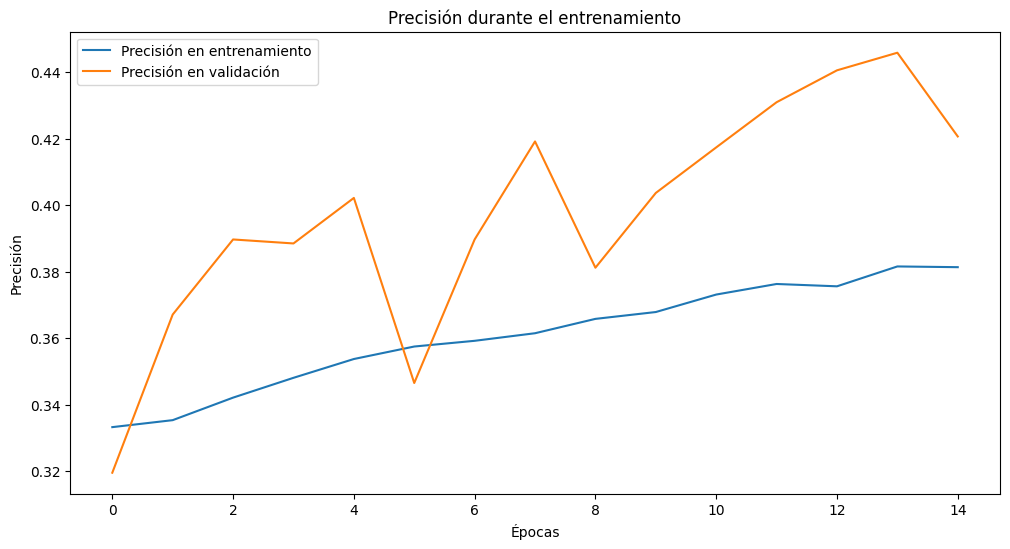

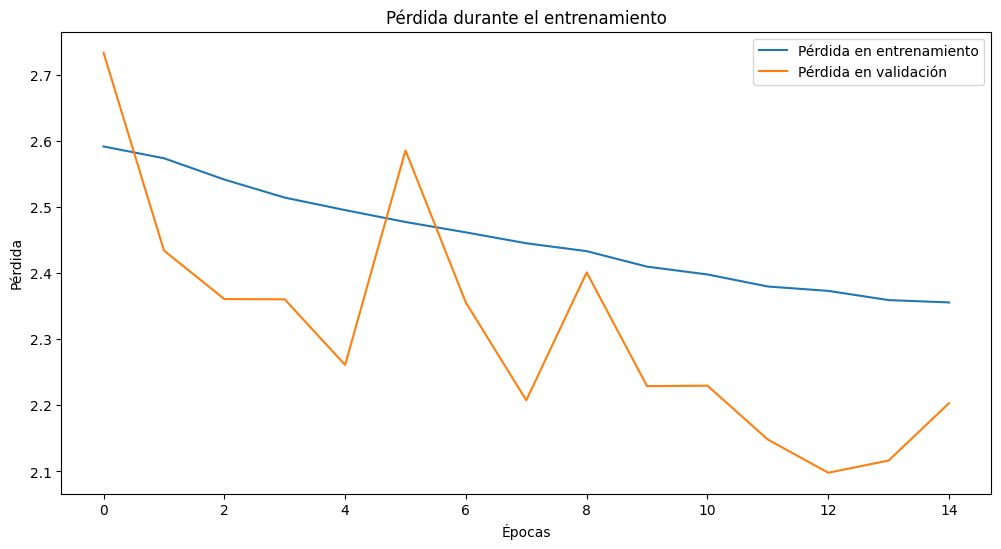

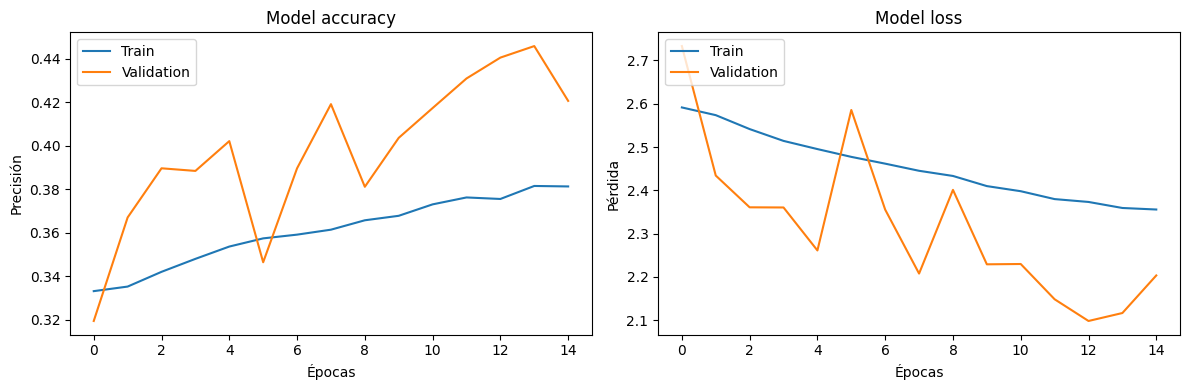

In [50]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

# Gráfica de precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfica de precisión y pérdida (ajustadas al formato de las primeras gráficas)
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Model accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Model loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [43]:
model.save('cifar100_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 2.3562 - accuracy: 0.3844
Test Loss: 2.356217861175537
Test Accuracy: 0.38440001010894775
Reporte de clasificación:
                precision    recall  f1-score   support

        apple       0.80      0.70      0.74       100
aquarium fish       0.50      0.50      0.50       100
         baby       0.46      0.27      0.34       100
         bear       0.26      0.14      0.18       100
       beaver       0.20      0.14      0.17       100
          bed       0.29      0.29      0.29       100
          bee       0.38      0.50      0.43       100
       beetle       0.40      0.48      0.44       100
      bicycle       0.28      0.46      0.34       100
       bottle       0.57      0.45      0.50       100
         bowl       0.30      0.14      0.19       100
          boy       0.32      0.22      0.26       100
       bridge       0.37      0.39      0.38       100
          bus       0.21      0.38      0.27     

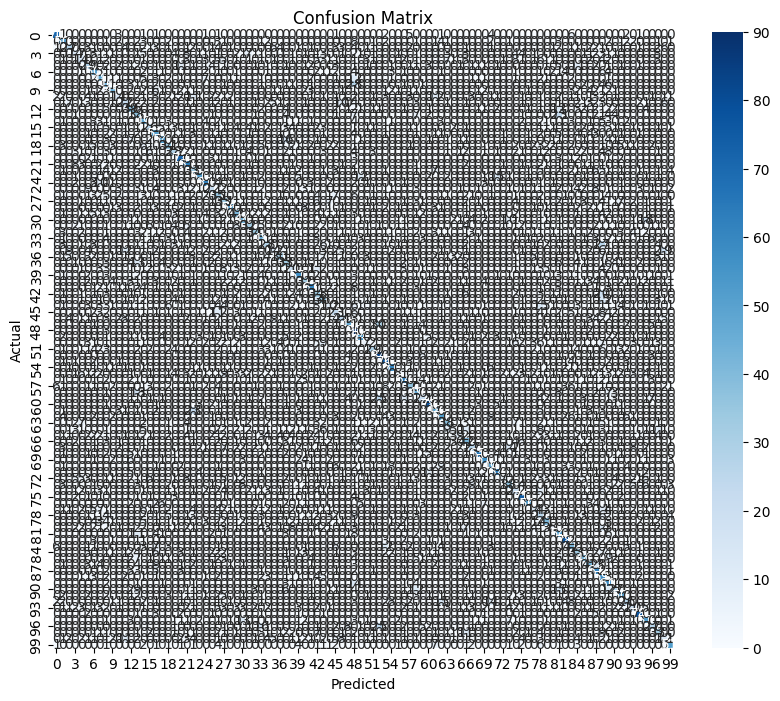

In [44]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generar el informe de clasificación
class_report = classification_report(y_true_classes, y_pred_classes, target_names=classes)
print('Reporte de clasificación:\n', class_report)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


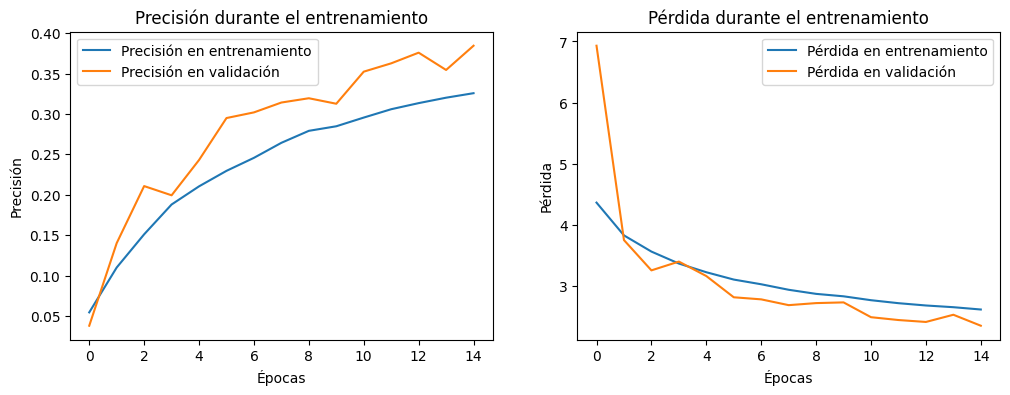

In [45]:
# Gráfica de precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

plt.show()


In [46]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
class_report = classification_report(y_true_classes, y_pred_classes, target_names=classes)
print('Reporte de clasificación:\n', class_report)


Reporte de clasificación:
                precision    recall  f1-score   support

        apple       0.80      0.70      0.74       100
aquarium fish       0.50      0.50      0.50       100
         baby       0.46      0.27      0.34       100
         bear       0.26      0.14      0.18       100
       beaver       0.20      0.14      0.17       100
          bed       0.29      0.29      0.29       100
          bee       0.38      0.50      0.43       100
       beetle       0.40      0.48      0.44       100
      bicycle       0.28      0.46      0.34       100
       bottle       0.57      0.45      0.50       100
         bowl       0.30      0.14      0.19       100
          boy       0.32      0.22      0.26       100
       bridge       0.37      0.39      0.38       100
          bus       0.21      0.38      0.27       100
    butterfly       0.34      0.49      0.40       100
        camel       0.37      0.26      0.30       100
          can       0.36      0.51   

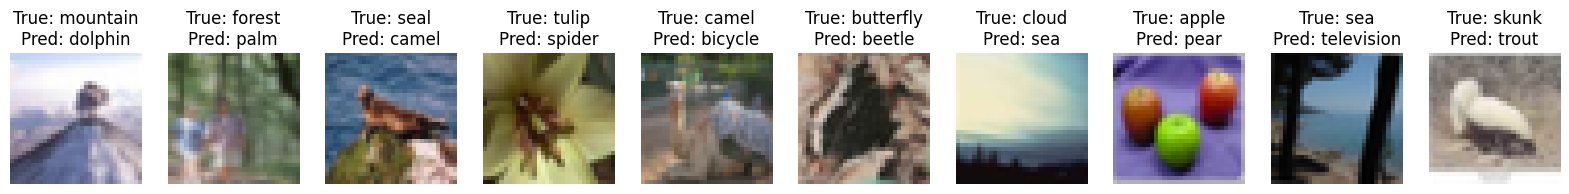

In [47]:
# Identificar índices de predicciones incorrectas
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Mostrar algunas imágenes incorrectamente clasificadas
def plot_incorrect_predictions(images, true_labels, pred_labels, classes, indices, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        index = indices[i]
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[index])
        true_label = classes[true_labels[index]]
        predicted_label = classes[pred_labels[index]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.show()

plot_incorrect_predictions(x_test, y_true_classes, y_pred_classes, classes, incorrect_indices)


In [48]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 13, 13, 64)       